PROBLEM ANAYLSIS /UNDERSTANDING


The global  coronavirus disease 2019 (COVID-19) pandemic caused by the SARS-CoV-2 continues to pose a critical and urgent threat to global health. The outbreak in early December 2019 in the Hubei province of the People’s Republic of China has spread worldwide. Many have died from the disease and the number of the infected people are on high . the pandemic has increasingly continue to challenge the medical sector and the situation is crucial .

Due to this  Prediction models  based on data that combine several features of previously tested patient  to estimate the risk of infection have been developed, in the hope of assisting medical staff  in triaging patients, especially in the context of limited healthcare resources. 

In this project ,  we propose a machine-learning model that predicts  whether a patient covid test is positive or negative  by asking eight basic questions. The model was trained on data of all individuals  tested for COVID19 during  the COVID-19 pandemic. our model can be deployed online  for effective screening and prioritization of testing for the virus in the people 


DESCRIPTION OF THE DATASET USED

Dataset were are using is freely available at:  https://github.com/nshomron/covidpred/tree/master/data
The  data set  has been recorded   and found to be suitable for developing a mining model, because of lesser missing values,  outliers .The data is cleaned and preprocessed before it is submitted to the proposed algorithm for training and testing . The overall objective of this  work is to predict more accurately whether a patient is suffering of covid19. The dataset  is created based on 278848  cases of   covid patient tested   and has 10 attributes  as follows:

 test_date   - date which the patient is tested for the disease 

 symptoms :
 
cough   - this column has record of 0 meaning  the patient has no cough symptoms  and 1 meaning the patient has 

fever -this column has record of 0 meaning  the patient has no fever symptoms  and 1 meaning the patient has    

sore_throat    - this column has record of 0 meaning  the patient has no sorethroat symptoms  and 1 meaning the patient has    

shortness_of_breath - this column has record of 0 meaning  the patient has no shortness of breath symptoms  and 1 meaning the patient has

head_ache  this column has record of 0 meaning  the patient has no headache symptoms  and 1 meaning the patient has  headache 

  
infromation about the patient :

age_60_and_above   - this colum has record of NONE meaning the patient preferred to say their age , YES meaning the patient is age above 60 and NO meaning the patient is below 60 

gender   -   this column has record of female , male , and none meaning the patient prefered not to say their gender 

contact with an individual confirmed to have COVID-19:

test_indication   - this column has record other , Abroad , contact with confirmed 

corona_result - this is the target variables and has unique value positive meaning the patient has covid 19 , negetive meaning patient has no covid 19 and other meaning patient prefered the result not to be said 

DATA PREPARATION AND PREPROCESSING 


importing the required libraries


In [1]:
#general libraries
import pandas as pd
import numpy as np 



#visualizing the libraries
import matplotlib.pyplot as plt
import seaborn as sns 

#modelling libraries

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
covid = pd.read_csv('corona_test_indiviual.csv')
covid.head()

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [3]:
covid.shape

(278848, 10)

In [4]:
covid.dtypes

test_date              object
cough                  object
fever                  object
sore_throat            object
shortness_of_breath    object
head_ache              object
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [6]:
covid.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,2020-04-20,0,0,0,0,0,negative,None,female,Other
freq,10921,121649,133942,260664,261079,260079,260227,127320,130158,242741


Data cleaning 

remove duplicate

In [7]:
#check duplicate
covid.duplicated().sum()

272068

In [8]:
#drop all the duplicate
covid.drop_duplicates(inplace=True)

In [9]:
covid.shape

(6780, 10)

checking missing values

In [10]:
#missing values 
covid.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

drop irrelevant column

In [11]:
#drop irrelevant column 

covid.drop('test_date', axis = 1 , inplace =True)

checking unique value in our categorical column and then mapping into numerical data 

In [12]:
covid['gender'].unique()

array(['female', 'male', 'None'], dtype=object)

In [13]:
#convert the gender  to numerical 
#create a mapping 
mapping ={'female':0 , 'male' :1 , 'None' :2}
covid['gender'].replace(mapping , inplace=True)

In [14]:
covid['age_60_and_above'].unique()

array(['None', 'Yes', 'No'], dtype=object)

In [15]:
#convert the age>60  to numerical 
#create a mapping 
mapping ={'No': 0 , 'Yes' :1 , 'None' :2}
covid['age_60_and_above'].replace(mapping , inplace=True)

In [16]:

covid['test_indication'].unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)

In [17]:
#convert the test indication   to numerical 
#create a mapping 
mapping ={'Other': 0 , 'Abroad' :1 , 'Contact with confirmed' :2}
covid['test_indication'].replace(mapping , inplace=True)

In [18]:
covid['corona_result'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [19]:
#remove the other string  in the corona_result column 

# Get indexes where corona_result  column has value other 
indexother = covid[covid['corona_result'] == 'other'].index
 
# Delete these row indexes from dataFrame
covid.drop(indexother , inplace=True)

In [20]:
#lets see the unqiue in the target column
covid['corona_result'].unique()

array(['negative', 'positive'], dtype=object)

In [21]:
#convert the corona result  to numerical 
#create a mapping 
mapping ={'negative' : 0 , 'positive' :1 }
covid['corona_result'].replace(mapping , inplace=True)

In [22]:
covid.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,2,0,0
1,1,0,0,0,0,0,2,0,0
2,0,1,0,0,0,0,2,1,0
4,1,0,0,0,0,0,2,1,0
6,1,1,0,0,0,0,2,1,1


In [23]:
#lets see if we have duplicates
covid.duplicated().sum()

4879

In [24]:
#dropduplicates
covid.drop_duplicates(inplace=True)

In [25]:
covid.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,2,0,0
1,1,0,0,0,0,0,2,0,0
2,0,1,0,0,0,0,2,1,0
4,1,0,0,0,0,0,2,1,0
6,1,1,0,0,0,0,2,1,1


In [26]:

#convert our column type  from object 
covid = covid.apply(pd.to_numeric , errors ='coerce') 

In [27]:
covid.dtypes

cough                  float64
fever                  float64
sore_throat            float64
shortness_of_breath    float64
head_ache              float64
corona_result            int64
age_60_and_above         int64
gender                   int64
test_indication          int64
dtype: object

In [28]:
covid.isnull().sum()

cough                  29
fever                  29
sore_throat             1
shortness_of_breath     1
head_ache               1
corona_result           0
age_60_and_above        0
gender                  0
test_indication         0
dtype: int64

filling the missing value 

In [29]:
#impute cough 
covid['cough'].fillna(covid['cough'].mean() ,inplace= True)

In [30]:
#impute fever 
covid['fever'].fillna(covid['fever'].mean() ,inplace= True)

In [31]:
#impute sore_throat 
covid['sore_throat'].fillna(covid['sore_throat'].mean() ,inplace= True)

In [32]:
#impute shortness_of_breath
covid['shortness_of_breath'].fillna(covid['shortness_of_breath'].mean() ,inplace= True)

In [33]:
#impute   head_ache
covid['head_ache'].fillna(covid['head_ache'].mean() ,inplace= True)

In [34]:
#drop all duplicates
covid.drop_duplicates(inplace=True)

DATA VISUALIZATION 

In [35]:
covid['corona_result'].describe()

count    915.000000
mean       0.612022
std        0.487556
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: corona_result, dtype: float64

In [36]:
#lets visualize the target variable
covid['corona_result'].value_counts()

1    560
0    355
Name: corona_result, dtype: int64

[Text(0, 0.5, 'no of people '), Text(0.5, 1.0, 'corona result value count')]

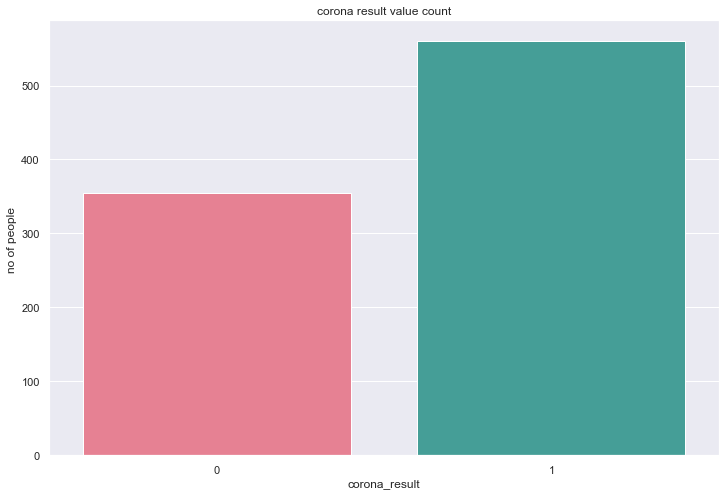

In [37]:
# set the figure to visualize 
sns.set(rc={'figure.figsize':(12 ,8)})

#create countplot 
sns.countplot( x = 'corona_result' , data = covid , palette = 'husl').set(ylabel = 'no of people ' , title = 'corona result value count')

[Text(0, 0.5, 'no of patient '),
 Text(0.5, 1.0, 'corona result  vs gender(female:0 , male :1 , None :2) ')]

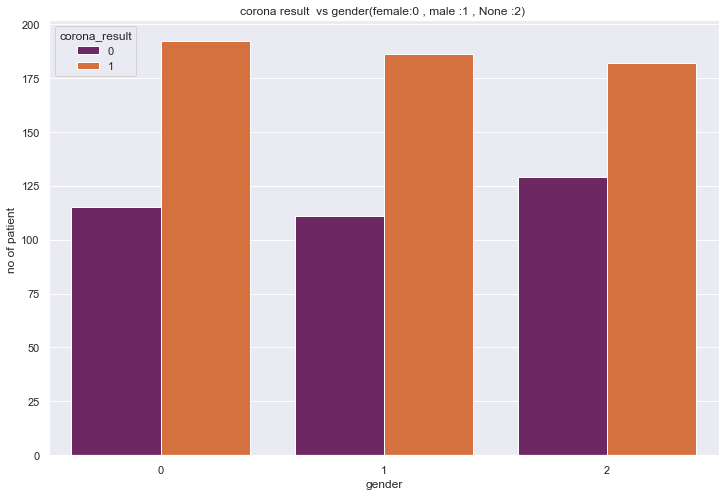

In [38]:
#patient tested  for  covid19 according to gender

sns.countplot(x = 'gender' , hue ='corona_result' , data = covid ,
              palette='inferno').set(ylabel = 'no of patient ' , title = 'corona result  vs gender(female:0 , male :1 , None :2) ')


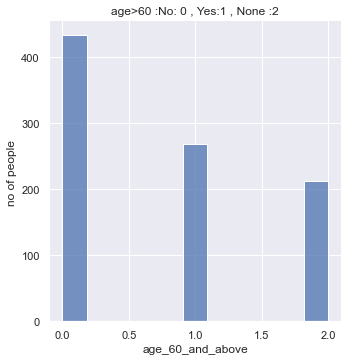

In [39]:
#pateint age distribution
sns.displot(data=covid, x='age_60_and_above').set(ylabel = 'no of people ' , title = 'age>60 :No: 0 , Yes:1 , None :2')

[Text(0, 0.5, 'no of patient '),
 Text(0.5, 1.0, 'corona result  vs  age>60( :No: 0 , Yes:1 , None :2 ) ')]

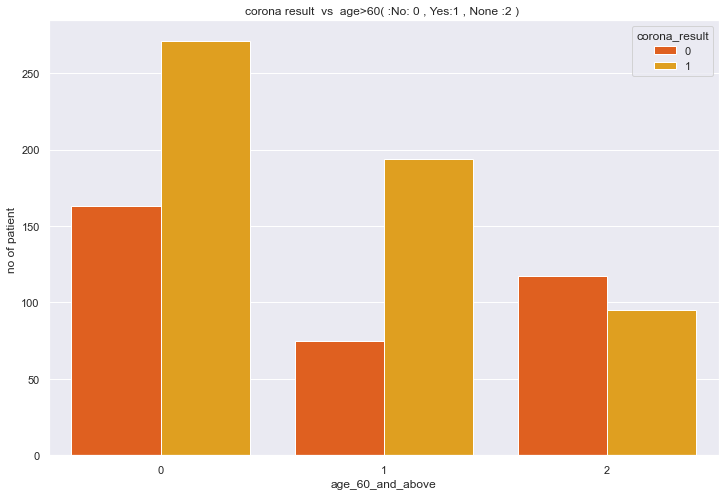

In [40]:
#pateint tested for  covid  and age distribution 
sns.countplot(x = 'age_60_and_above' , hue ='corona_result' , data = covid ,
              palette='autumn').set(ylabel = 'no of patient ' , title = 'corona result  vs  age>60( :No: 0 , Yes:1 , None :2 ) ')

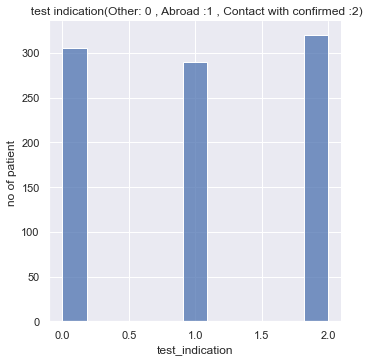

In [41]:
#test indiaction distribution
sns.displot(data= covid , x='test_indication'
).set(ylabel = 'no of patient ' , title ='  test indication(Other: 0 , Abroad :1 , Contact with confirmed :2) ')

[Text(0, 0.5, 'no of patient '),
 Text(0.5, 1.0, 'corona result  vs  test indication(Other: 0 , Abroad :1 , Contact with confirmed :2) ')]

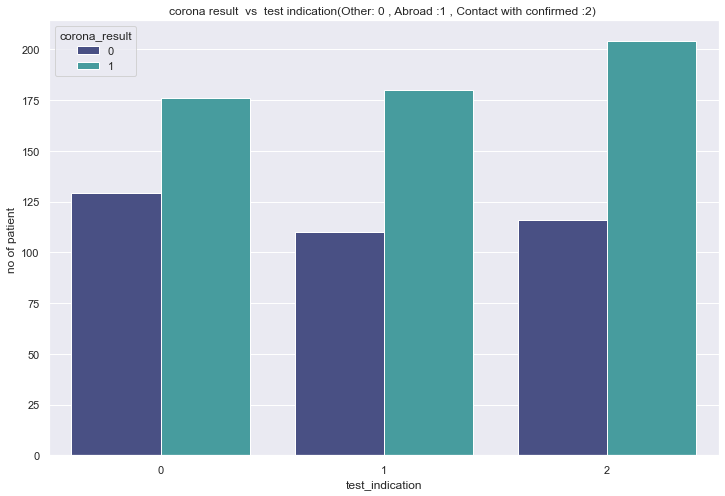

In [42]:
#corona result according to test indication
sns.countplot(x = 'test_indication' , hue ='corona_result' , data = covid ,
            palette='mako').set(ylabel = 'no of patient ' , title = 'corona result  vs  test indication(Other: 0 , Abroad :1 , Contact with confirmed :2) ')

MODEL DEPLOYMENT 

In [43]:
#spilt the data 
x=covid.drop('corona_result' , axis=1)
y=covid['corona_result']

#print(x)

In [44]:
print(x)

           cough     fever  sore_throat  shortness_of_breath  head_ache  \
0       0.000000  0.000000          0.0                  0.0        0.0   
1       1.000000  0.000000          0.0                  0.0        0.0   
2       0.000000  1.000000          0.0                  0.0        0.0   
4       1.000000  0.000000          0.0                  0.0        0.0   
6       1.000000  1.000000          0.0                  0.0        0.0   
...          ...       ...          ...                  ...        ...   
278634  0.000000  0.000000          0.0                  0.0        1.0   
278641  1.000000  1.000000          1.0                  0.0        0.0   
278833  0.000000  1.000000          1.0                  0.0        0.0   
278834  1.000000  0.000000          1.0                  0.0        1.0   
278835  0.551667  0.504167          0.0                  0.0        0.0   

        age_60_and_above  gender  test_indication  
0                      2       0               

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [46]:
#function for model training 
def model_trainer(data , models): #data here is feeed as a tuple
    xtrain ,xtest ,ytrain,ytest =  data #here we are unpacking the tuple into xtrain xtest ytrain ytest 
    for model in models: #model here are in list 
        model.fit(xtrain, ytrain) #train the model on xtrain and ytrain 
        prediction =model.predict(xtest) #pred on the fit model 
        accuracy = round(accuracy_score(ytest , prediction) *100,2)# accuracy compare btwn ytest and preds
        print(f'Model: {model} , accuracy:{accuracy}')

In [47]:
#define the parameters that we want to put it on our model trainer 
#define the data
data = (xtrain , xtest , ytrain , ytest)
#define the models
kn = KNeighborsClassifier()
svc =SVC ()
forest = RandomForestClassifier()
dt = DecisionTreeClassifier()
models=(kn , svc , forest , dt) #save the it in a list called models

In [48]:
#train the model and  get best performance
#call our function
model_trainer(data=data ,  models=models)

Model: KNeighborsClassifier() , accuracy:48.73
Model: SVC() , accuracy:61.09
Model: RandomForestClassifier() , accuracy:38.91
Model: DecisionTreeClassifier() , accuracy:33.45


saving model with the highest accuracy 

In [49]:
import joblib 

In [50]:
#we save our model using joblib

import joblib 
#save svc pkl')

joblib.dump(svc  , 'svc.pkl')     #dump SVC and give it a filename svc.pkl

['svc.pkl']

In [51]:
#we have saved our model let see if works 
#if the output is 0 the patient has no covid if the output is 1 the patient has covid 
data=np.array([[0 , 0 , 0, 0,0,2,0,0 ]])
svc.predict(data)

array([0], dtype=int64)